In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Read csv

In [2]:
df=pd.read_csv('train_LZdllcl.csv') #reading csv file
df.head() # getting a glimpse of it

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [3]:
df.shape 

(54808, 14)

In [4]:
df.info()#finding datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [5]:
df.drop_duplicates(keep='first', inplace=True) #dropping duplicate rows if any
df.shape

(54808, 14)

In [6]:
df.isnull().sum() #finding null values

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

# Null Imputation in 'education'

In [7]:
print("% of different values in 'education'")
(df['education'].value_counts()/df['education'].count())*100

% of different values in 'education'


Bachelor's          69.980343
Master's & above    28.483368
Below Secondary      1.536289
Name: education, dtype: float64

In [8]:
print(df.age.min(),df.age.max()) #finding range of age

20 60


In [9]:
df['age_category']=df['age'].astype(int)
#dividing age into 4 categories
df.loc[(df['age'] >= 20) & (df['age'] <30), 'age_category'] = 1
df.loc[(df['age'] >= 30) & (df['age'] < 40), 'age_category'] = 2
df.loc[(df['age'] >= 40) & (df['age'] < 50), 'age_category'] = 3
df.loc[df['age']>=50,'age_category']=4

df['age_category'].value_counts()

2    28030
1    14453
3     8952
4     3373
Name: age_category, dtype: int64

In [10]:
df.groupby('age_category')[['education']].agg(pd.Series.mode)
#finding mode of education in each category

,education
age_category,
1,Bachelor's
2,Bachelor's
3,Bachelor's
4,Master's & above


In [11]:
#imputing nulls in education with mode of education in their age_category
df.loc[((df['age_category']==1)|(df['age_category']==2)|(df['age_category']==3))&(df['education'].isnull()),'education']="Bachelor's"
df.loc[(df['age_category']==4)&(df['education'].isnull()),'education']="Master's & above"
df.education.isnull().sum()

0

In [12]:
print(df.shape)
df.drop(['age_category'],axis=1,inplace=True) #dropping age_category
print(df.shape)

(54808, 15)
(54808, 14)


In [13]:
df.isnull().sum()

employee_id                0
department                 0
region                     0
education                  0
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

# Null impulation in 'previous_year_rating'

In [14]:
df['previous_year_rating'].isnull().groupby(df['length_of_service']).sum()
# we see that 100% nulls of 'previous_year_rating' are present where their 'length_of_service' is 1

length_of_service
1     4124.0
2        0.0
3        0.0
4        0.0
5        0.0
6        0.0
7        0.0
8        0.0
9        0.0
10       0.0
11       0.0
12       0.0
13       0.0
14       0.0
15       0.0
16       0.0
17       0.0
18       0.0
19       0.0
20       0.0
21       0.0
22       0.0
23       0.0
24       0.0
25       0.0
26       0.0
27       0.0
28       0.0
29       0.0
30       0.0
31       0.0
32       0.0
33       0.0
34       0.0
37       0.0
Name: previous_year_rating, dtype: float64

In [15]:
temp=df.loc[df['length_of_service']==1,['length_of_service','previous_year_rating']]
temp.info()
#we see that where 'length_of_service'==1: 4124 values are null,423 are non-null

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4547 entries, 10 to 54801
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   length_of_service     4547 non-null   int64  
 1   previous_year_rating  423 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 106.6 KB


In [16]:
#imputing nulls with mode
df['previous_year_rating'].fillna(temp.previous_year_rating.mode()[0],inplace=True)

In [17]:
df.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [18]:
print(df.previous_year_rating.dtypes)
df.previous_year_rating.unique()

float64


array([5., 3., 1., 4., 2.])

In [19]:
#since all the unique values are numbers, changing its type from float to int
df['previous_year_rating']=df.previous_year_rating.astype('int')
print(df.previous_year_rating.dtypes)

int32


In [20]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
print(numeric_cols)

Index(['employee_id', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')


# 'age' Univariate Analysis

percentage of outliers: 1.1658881915048898


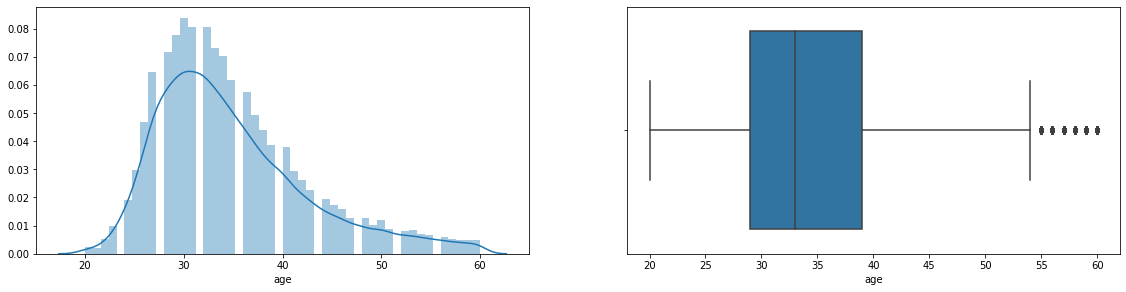

In [21]:
plt.figure(figsize=(30, 10))
plt.subplot(2, 3, 1)
sns.distplot(df["age"])
plt.subplot(2, 3, 2)
sns.boxplot(df["age"])
#distplot is right-skewed, there are outliers in right side
from scipy import stats
z = np.abs(stats.zscore(df.age))
z_out=np.where(z > 3)
print("percentage of outliers:",(len(z_out[0])/len(z))*100)

In [22]:
from scipy.stats import skew,kurtosis
#finding skew and kurtosis
print("skewness: ",skew(df['age']))
print("kurtosis: ",kurtosis(df['age']))

skewness:  1.0074041991665104
kurtosis:  0.7921716155052358


In [23]:
# #trying boxcox to remove outliers from 'age' and normalize it
# df['age_boxcox'],fitted_lambda = stats.boxcox(df['age'])
# plt.figure(figsize=(30, 10))
# plt.subplot(2, 3, 1)
# sns.distplot(df["age_boxcox"])
# plt.subplot(2, 3, 2)
# sns.boxplot(df["age_boxcox"])
# print("skewness:",skew(df['age_boxcox']))
# print("kurtosis:",kurtosis(df['age_boxcox']))
# z = np.abs(stats.zscore(df.age_boxcox))
# z_out=np.where(z > 3)
# #it became far better, outliers were handled
# print("percentage after boxcox:",(len(z_out[0])/len(z))*100)

In [24]:
# label=[1,2,3,4,5]
# df["age_bins"],bining=pd.qcut(df["age"], 5,retbins=True,labels=label)
# print(bining)

# 'length_of_service' Univariate Analysis

In [25]:
print("skewness: ",skew(df['length_of_service']))
print("kurtosis: ",kurtosis(df['length_of_service']))

skewness:  1.7380138906484088
kurtosis:  4.413519234008749


percentage of outliers: 1.7789373814041745


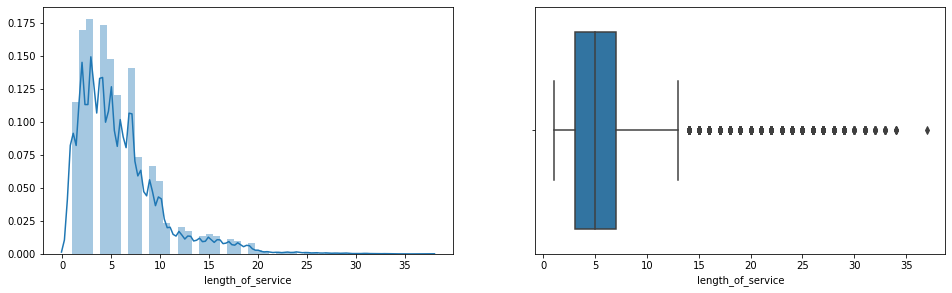

In [26]:
plt.figure(figsize=(25, 10))
plt.subplot(2, 3, 1)
sns.distplot(df["length_of_service"])
plt.subplot(2, 3, 2)
sns.boxplot(df["length_of_service"])
z = np.abs(stats.zscore(df.length_of_service))
z_out=np.where(z > 3)
print("percentage of outliers:",(len(z_out[0])/len(z))*100)

In [27]:
#the distribution is multimodal cannot be tranformed to normal by log/sqrt transformation technique

# 'avg_training_score' Univariate Analysis

percentage of outliers: 0.0


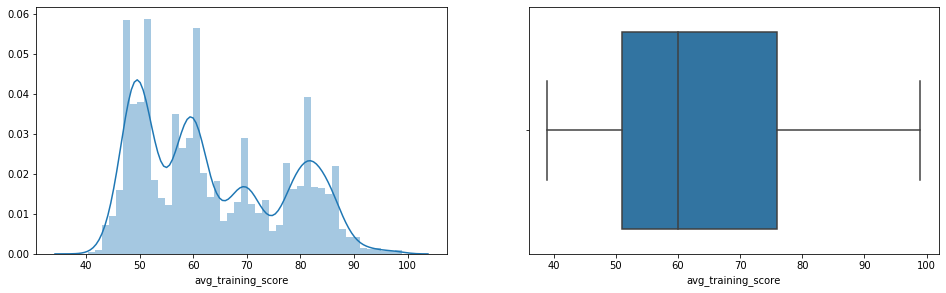

In [28]:
plt.figure(figsize=(25, 10))
plt.subplot(2, 3, 1)
sns.distplot(df["avg_training_score"])
plt.subplot(2, 3, 2)
sns.boxplot(df["avg_training_score"])
z = np.abs(stats.zscore(df.avg_training_score))
z_out=np.where(z > 3)
print("percentage of outliers:",(len(z_out[0])/len(z))*100)
#no outliers to handle

In [29]:
print("skewness: ",skew(df['avg_training_score']))
print("kurtosis: ",kurtosis(df['avg_training_score']))

skewness:  0.4518957174817265
kurtosis:  -1.0496630185097398


# 'gender' Univariate plot

m    70.237921
f    29.762079
Name: gender, dtype: float64

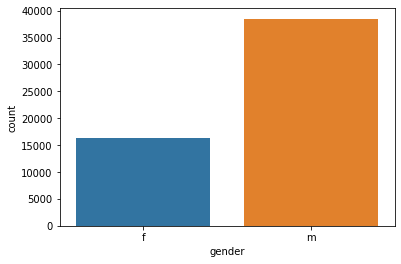

In [30]:
sns.countplot(df['gender'])
(df['gender'].value_counts()/df['gender'].count())*100
#male population is dominant

# 'department' Univariate Analysis

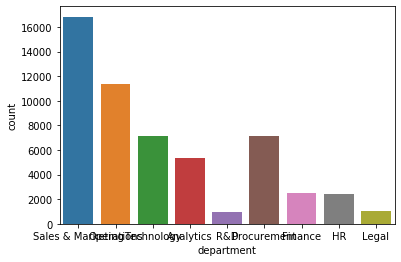

In [31]:
sns.countplot(df['department'])
#sales and marketing dept has maximum population. 
#the number of promotions are almost same in Sales & Marketing,Operations,Analytics,Procurement 
# the number od promotions in the rest is same

# 'education' Univariate Analysis

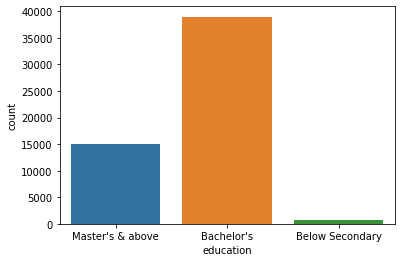

In [32]:
sns.countplot(df['education'])
#majority of the population has completed Bachelor's followed by Master's

# 'avg_training_score' Univariate Analysis

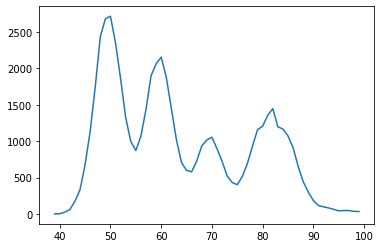

In [33]:
df['avg_training_score'].value_counts().sort_index().plot.line()
#majority of the people have training score of 50, then 60 and so on
#very few people have a score of 90 and above

# 'KPIs_met >80%' Univariate Analysis

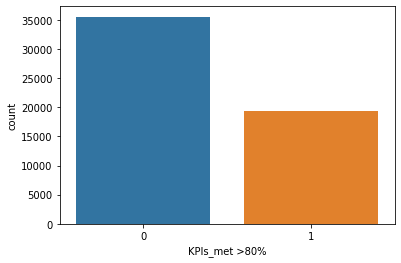

In [34]:
sns.countplot(df['KPIs_met >80%'])
#majority of people dont have their kpi>80%

## Bivariate Analysis

In [35]:
df_mv=df[['age','length_of_service','avg_training_score','previous_year_rating','is_promoted']]
df_mv

,age,length_of_service,avg_training_score,previous_year_rating,is_promoted
0,35,8,49,5,0
1,30,4,60,5,0
2,34,7,50,3,0
3,39,10,50,1,0
4,45,2,73,3,0
...,...,...,...,...,...
54803,48,17,78,3,0
54804,37,6,56,2,0
54805,27,3,79,5,0
54806,29,2,45,1,0


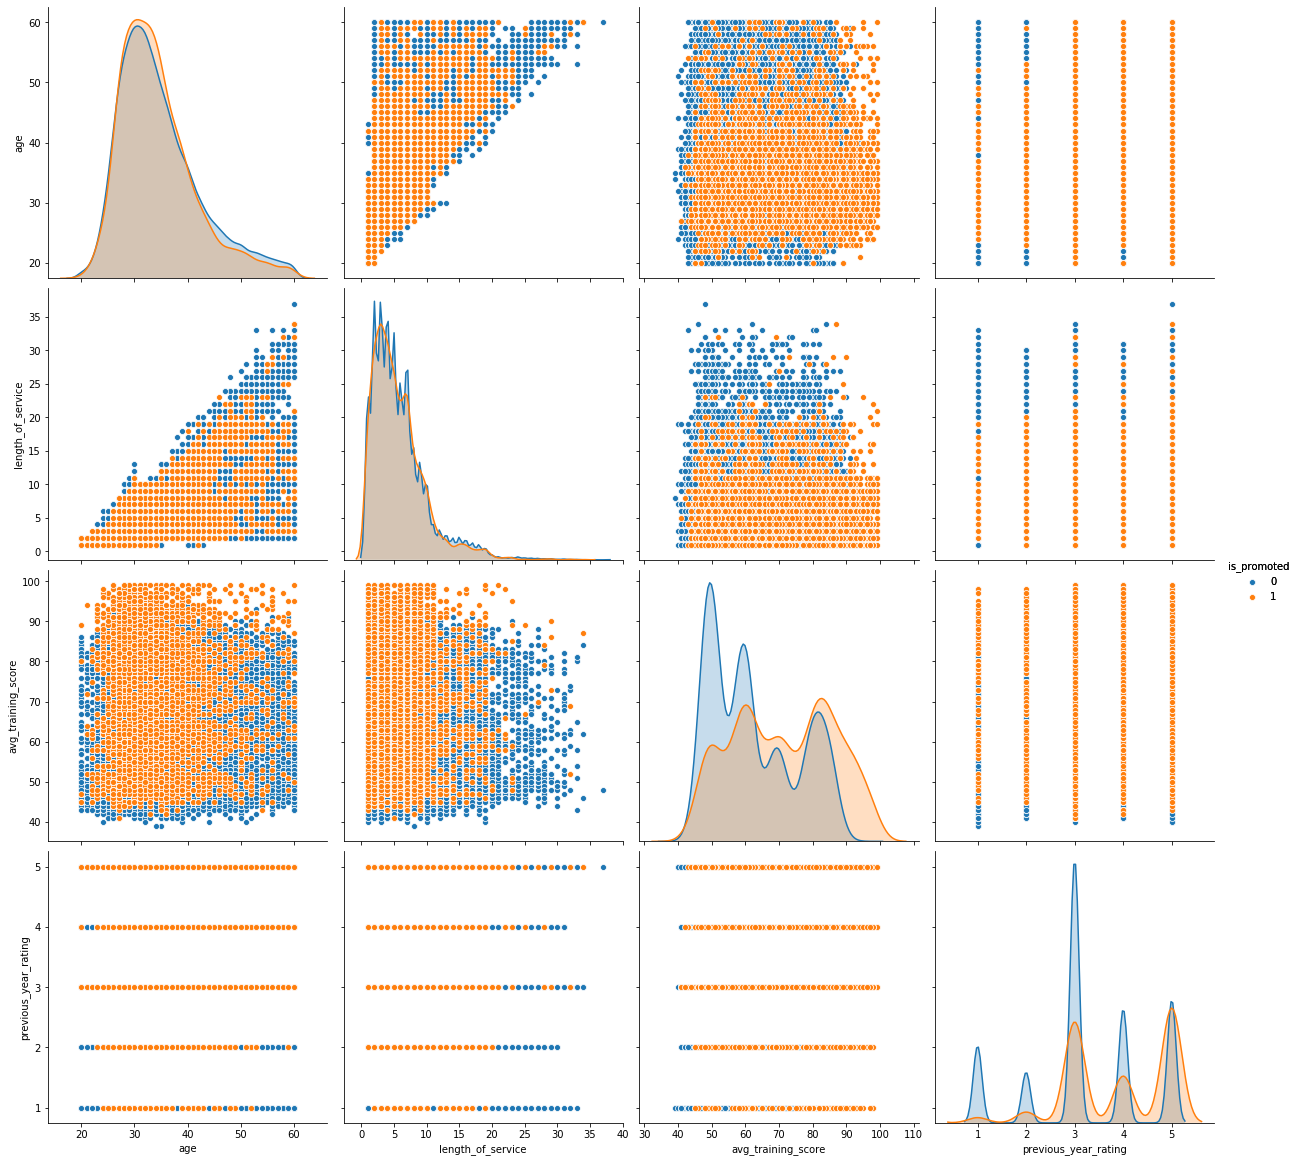

In [36]:
sns.pairplot(df_mv,hue="is_promoted",height=4).add_legend()

In [37]:
#We make the following inferences from the above pairplot 
#hence we view them in detail in form of other plots to confirm

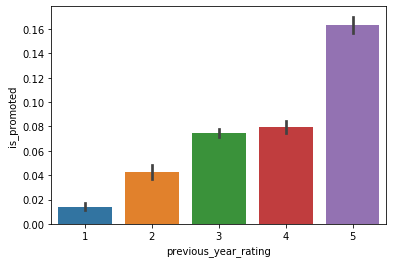

In [38]:
#person with previous year rating=5 has more chances of getting promoted than the rest
sns.barplot(df.previous_year_rating,df.is_promoted)

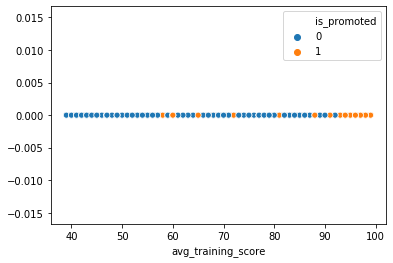

In [39]:
#person with avg_training_score>90 have high chances of promotion
sns.scatterplot(x=df['avg_training_score'],y=np.zeros_like(df['avg_training_score']),hue=df["is_promoted"])

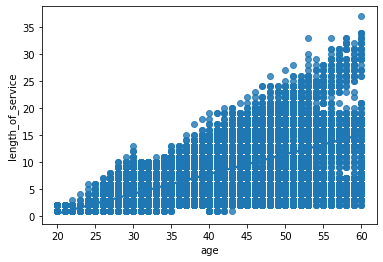

In [40]:
#there is some relationship between length_of_service and age
sns.regplot(x=df['age'],y=df['length_of_service'])

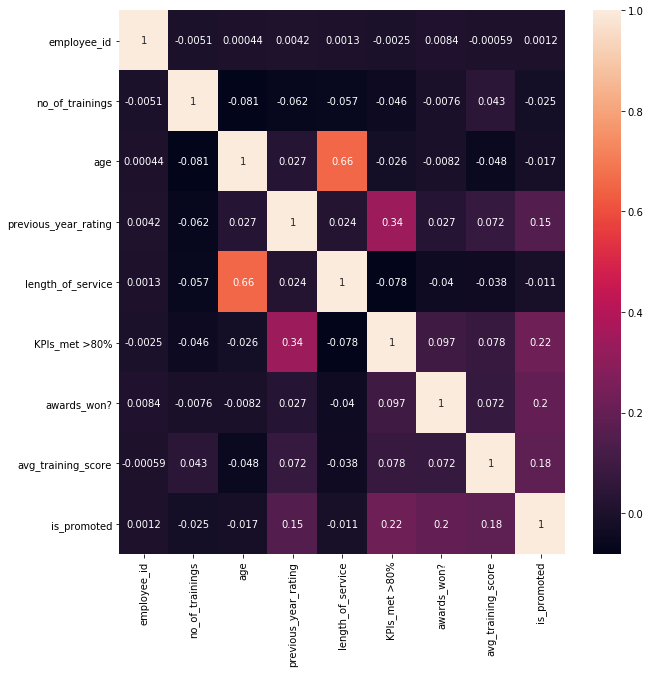

In [41]:
plt.figure(figsize=(10,10))
sns.heatmap(data=df.corr(),annot=True)

In [42]:
#obviously:
#age & age_boxcox are correlated
#age & length_of_service are correlated
#age_boxcox & length of service are correlated

is_promoted,0,1
no_of_trainings,,
1,40468.0,3910.0
2,7382.0,605.0
3,1654.0,122.0
4,442.0,26.0
5,125.0,3.0
6,42.0,2.0
7,12.0,NaN
8,5.0,NaN
9,5.0,NaN


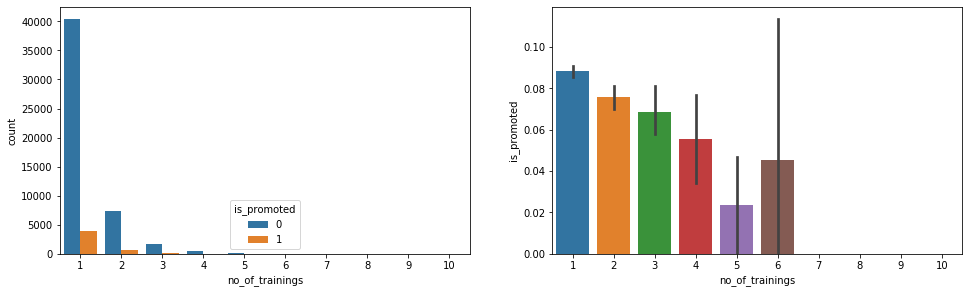

In [43]:
plt.figure(figsize=(25, 10))
plt.subplot(2, 3, 1)
sns.countplot(df['no_of_trainings'],hue=df['is_promoted'])
plt.subplot(2, 3, 2)
sns.barplot(df['no_of_trainings'],df['is_promoted'])
df.groupby('no_of_trainings')['is_promoted'].value_counts().unstack()
#clearly from above two graphs, the people who have done only 1 or 2 trainings have higher chances of getting promoted
#also people who have done training>6 are very very less likely to get promoted

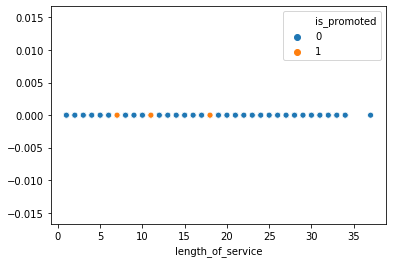

In [44]:
sns.scatterplot(x=df['length_of_service'],y=np.zeros_like(df['length_of_service']),hue=df['is_promoted'])
#after 20 years of service, the chances of getting promoted is very less

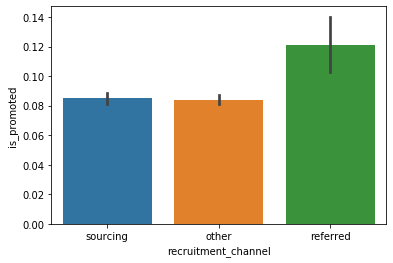

In [45]:
sns.barplot(df.recruitment_channel,df.is_promoted)
#if you have been recruited by reference then the chances of promotion are high compared to rest

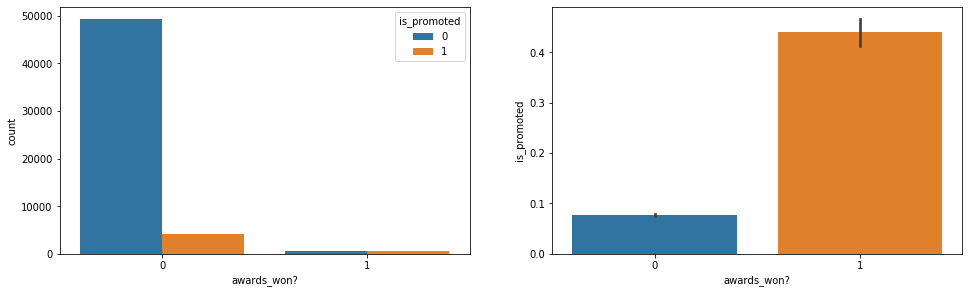

In [46]:
plt.figure(figsize=(25, 10))
plt.subplot(2, 3, 1)
sns.countplot(df['awards_won?'],hue=df['is_promoted'])
plt.subplot(2, 3, 2)
sns.barplot(df['awards_won?'],df['is_promoted'])
#if a person has won an award, chances of him getting promoted is high

In [47]:
df.shape

(54808, 14)

# Train & localtest splitting

In [48]:
from sklearn.model_selection import train_test_split
train, localtest = train_test_split(
    df,
    test_size=0.3,
    random_state=0,
    stratify=df['is_promoted']  )

train.shape, localtest.shape

((38365, 14), (16443, 14))

In [49]:
train.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

# Feature Engineering

skewness: 0.020837759661986165
kurtosis: -0.26592716457444654


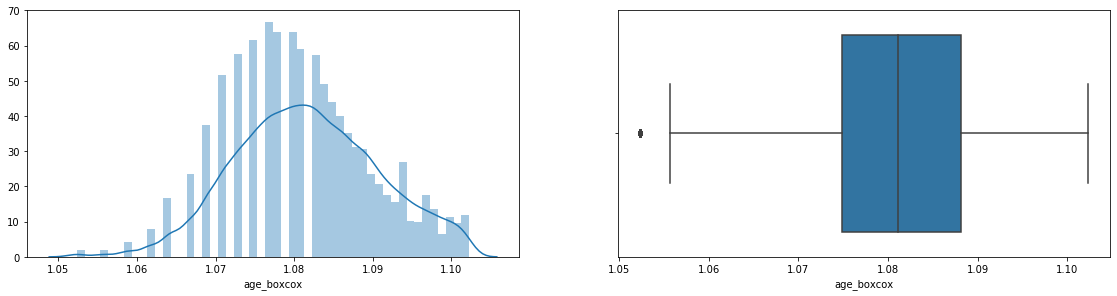

In [50]:
#trying boxcox to remove outliers from 'age'
train['age_boxcox'],fitted_lambda = stats.boxcox(train['age'])
plt.figure(figsize=(30, 10))
plt.subplot(2, 3, 1)
sns.distplot(train["age_boxcox"])
plt.subplot(2, 3, 2)
sns.boxplot(train["age_boxcox"])
print("skewness:",skew(train['age_boxcox']))
print("kurtosis:",kurtosis(train['age_boxcox']))
localtest['age_boxcox'] = stats.boxcox(localtest['age'], fitted_lambda)

In [51]:
label=["1","2","3","4"]
train["agebin"],bining=pd.qcut(train["age"], 4,retbins=True,labels=label)
localtest["agebin"]=pd.cut(localtest["age"],bins=bining,labels=label)
#applied binning to ages based on the quartile.. mapped it with test
print(bining)

train.drop("age",axis=1,inplace=True)
localtest.drop("age",axis=1,inplace=True)
#dropped the original age column as it has been transformed and is of no use now

[20. 29. 33. 39. 60.]


In [52]:
train.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted', 'age_boxcox', 'agebin'],
      dtype='object')

In [53]:
#label encoding the education column with weights:1,2,3
#it is based on education qualification: masters>bachelors>below secondary
train['education'].replace("Master's & above",3,inplace=True)
train['education'].replace("Bachelor's",2,inplace=True)
train['education'].replace("Below Secondary",1,inplace=True)

localtest['education'].replace("Master's & above",3,inplace=True)
localtest['education'].replace("Bachelor's",2,inplace=True)
localtest['education'].replace("Below Secondary",1,inplace=True)

In [54]:
#from eda we observed some imp features, which play imp role in promotion of employee
#made a performance metric to score an employee based on his education,award and ratings
train['total_performance_factor']=round((train['education']/3)*5)+train['awards_won?']*5+train['previous_year_rating']
localtest['total_performance_factor']=round((localtest['education']/3)*5)+localtest['awards_won?']*5+localtest['previous_year_rating']

In [55]:
#new feature for employees having met their KPI>80 & have won an award
train.loc[(train['KPIs_met >80%']==1)&(train['awards_won?']==1),'Award&KPI']=1
train['Award&KPI'].fillna(0,inplace=True)
train['Award&KPI']=train['Award&KPI'].astype(int)

localtest.loc[(localtest['KPIs_met >80%']==1)&(localtest['awards_won?']==1),'Award&KPI']=1
localtest['Award&KPI'].fillna(0,inplace=True)
localtest['Award&KPI']=localtest['Award&KPI'].astype(int)

In [56]:
#target encoding for the 'region' column
#Target encoding is the process of replacing a categorical value with the mean of the target variable. 
region_mean_dict=train.groupby('region')['is_promoted'].mean().to_dict()
region_mean_dict

{'region_1': 0.08256880733944955,
 'region_10': 0.08315565031982942,
 'region_11': 0.056353591160221,
 'region_12': 0.06951871657754011,
 'region_13': 0.0832443970117396,
 'region_14': 0.08205128205128205,
 'region_15': 0.08024377856780092,
 'region_16': 0.07157057654075547,
 'region_17': 0.14762741652021089,
 'region_18': 0.05,
 'region_19': 0.057096247960848286,
 'region_2': 0.07913254123889722,
 'region_20': 0.05110732538330494,
 'region_21': 0.03676470588235294,
 'region_22': 0.11425364758698092,
 'region_23': 0.1133250311332503,
 'region_24': 0.03856749311294766,
 'region_25': 0.11808118081180811,
 'region_26': 0.06683480453972257,
 'region_27': 0.08782608695652173,
 'region_28': 0.10930735930735931,
 'region_29': 0.05240174672489083,
 'region_3': 0.12133891213389121,
 'region_30': 0.07641921397379912,
 'region_31': 0.05417276720351391,
 'region_32': 0.04682779456193353,
 'region_33': 0.04945054945054945,
 'region_34': 0.019230769230769232,
 'region_4': 0.1494057724957555,
 'regio

In [57]:
#target/mean encoding for the 'region' column
train['region_mean']=train['region'].map(region_mean_dict)
localtest['region_mean']=localtest['region'].map(region_mean_dict)
#since we have encoded the column and stored it in another feature,dropping the original
train.drop("region",axis=1,inplace=True)
localtest.drop("region",axis=1,inplace=True)

In [58]:
print(train.shape[0],train.employee_id.nunique())
#as all the values are unique, we are dropping it
train.drop("employee_id",axis=1,inplace=True)
localtest.drop("employee_id",axis=1,inplace=True)

38365 38365


In [59]:
print(train.columns)

Index(['department', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted',
       'age_boxcox', 'agebin', 'total_performance_factor', 'Award&KPI',
       'region_mean'],
      dtype='object')


In [60]:
#we choose one-hot-encoding for the rest classification columns
#One hot encoding allows the representation of categorical data to be more expressive. 
#Many machine learning algorithms cannot work with categorical data directly. 
#The categories must be converted into numbers.
feature_eng_train=pd.get_dummies(train, columns=["department","recruitment_channel","agebin","gender"],drop_first=True)
print(feature_eng_train.shape)
#we "drop_first" to reduce redundant features
feature_eng_localtest=pd.get_dummies(localtest, columns=["department","recruitment_channel","agebin","gender"],drop_first=True)
print(feature_eng_localtest.shape)

(38365, 26)
(16443, 26)


In [61]:
print(feature_eng_train.columns)
#these are all the final features before we do selection

Index(['education', 'no_of_trainings', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted', 'age_boxcox',
       'total_performance_factor', 'Award&KPI', 'region_mean',
       'department_Finance', 'department_HR', 'department_Legal',
       'department_Operations', 'department_Procurement', 'department_R&D',
       'department_Sales & Marketing', 'department_Technology',
       'recruitment_channel_referred', 'recruitment_channel_sourcing',
       'agebin_2', 'agebin_3', 'agebin_4', 'gender_m'],
      dtype='object')


# Splitting in X & y

In [62]:
X_train=feature_eng_train.drop("is_promoted",axis=1)
y_train=feature_eng_train["is_promoted"]

X_localtest=feature_eng_localtest.drop("is_promoted",axis=1)
y_localtest=feature_eng_localtest["is_promoted"]

X_train.shape, X_localtest.shape, y_train.shape, y_localtest.shape

((38365, 25), (16443, 25), (38365,), (16443,))

# Scaling

In [63]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler() 
# X_train_scaled = scaler.fit_transform(X_train) 
# X_localtest_scaled = scaler.transform(X_localtest)

In [64]:
#Tree based models are not distance based models and can handle varying ranges of features. 
#Hence, Scaling is not required if I choose a tree-based model

# Feature Selection (FS)

# Filter Method for FS

In [65]:
from sklearn.feature_selection import VarianceThreshold
varModel=VarianceThreshold(threshold=0) #Setting variance threshold to 0 which means features that have same value in all samples.
varModel.fit(X_train)
constArr=varModel.get_support()
constCol=[col for col in X_train.columns if col not in X_train.columns[constArr]]
constCol
#there are no constant features in the dataset

[]

In [66]:
def correlation(dataset,threshold):
    col_corr=set() # set will contains unique values.
    corr_matrix=dataset.corr() #finding the correlation between columns.
    for i in range(len(corr_matrix.columns)): #number of columns
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold: #checking the correlation between columns.
                colName=corr_matrix.columns[i] #getting the column name
                col_corr.add(colName) #adding the correlated column name heigher than threshold value.
    return col_corr #returning set of column names
col=correlation(X_train,0.80)
print('Correlated columns:',col)
#using brute for method to call out highly correlated features

Correlated columns: {'Award&KPI'}


In [67]:
#dropping the highly correlated features
print("Before:",X_train.shape,X_localtest.shape)
X_train.drop(['Award&KPI'],axis=1,inplace=True)
X_localtest.drop(['Award&KPI'],axis=1,inplace=True)
print("After:",X_train.shape,X_localtest.shape)

Before: (38365, 25) (16443, 25)
After: (38365, 24) (16443, 24)


In [68]:
y_train.value_counts()

0    35097
1     3268
Name: is_promoted, dtype: int64

In [69]:
#also one of the most important observation is that the given dataset is unbalanced
#an unbalanced dataset is one in which the target variable has more observations in one specific class than the others.
#in our case, class '1' has very very less observations than class '0'
#to balance this, we need to compute the class weights and then assign those
from sklearn.utils import class_weight
a=class_weight.compute_class_weight('balanced',np.unique(y_train),y_train)
weights={0:a[0],1:a[1]}
weights #stored these in a dictionary

{0: 0.5465566857566174, 1: 5.869798041615667}

# Wrapper Method for FS

In [70]:
from sklearn.model_selection import StratifiedKFold
# Cross validation score
kfold=StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# Step Forward Selection

In [71]:
#Step forward feature selection starts with the evaluation of each individual feature, 
#and selects that which results in the best performing selected algorithm model.

In [72]:
from sklearn.ensemble import RandomForestClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
sfs= SFS(RandomForestClassifier(random_state=0,n_jobs=-1,class_weight=weights),
         k_features=(1,24),
         forward=True,
         floating=False,
         verbose=2,
         scoring='f1',
         cv=kfold,
         n_jobs=-1
        ).fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  1.1min finished

[2020-07-31 18:06:56] Features: 1/24 -- score: 0.272029702038137[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  23 | elapsed:  1.1min finished

[2020-07-31 18:08:01] Features: 2/24 -- score: 0.2890166419197044[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  22 | elapsed:  1.3min finished

[2020-07-31 18:09:21] Features: 3/24 -- score: 0.2899392102195259[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:  1.5min finished

[2020-07-31 18:10:51] Features: 4/24 -- score: 0.3172745721684097[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  2.1min finished

[

In [73]:
imp_feat_sfs=list(sfs.k_feature_names_)
print(len(imp_feat_sfs))
imp_feat_sfs

13


['KPIs_met >80%',
 'avg_training_score',
 'age_boxcox',
 'total_performance_factor',
 'region_mean',
 'department_Finance',
 'department_HR',
 'department_Operations',
 'department_Procurement',
 'department_R&D',
 'department_Sales & Marketing',
 'department_Technology',
 'recruitment_channel_referred']

In [74]:
sfs.k_score_

0.4664630098861311

# Loading Selected features in final train and localtest

In [75]:
X_final_train=pd.DataFrame(X_train,columns=imp_feat_sfs)
y_final_train=y_train
X_final_localtest=pd.DataFrame(X_localtest,columns=imp_feat_sfs)
y_final_localtest=y_localtest

# Random Forest Classifier

In [76]:
#It is an ensemble tree-based learning algorithm. 
#The Random Forest Classifier is a set of decision trees from randomly selected subset of training set. 
#It aggregates the votes from different decision trees to decide the final class of the test object.

In [77]:
rfc=RandomForestClassifier(class_weight=weights,random_state=1)
rfc.fit(X_final_train,y_final_train)
#training the random forest classifier

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 0.5465566857566174,
                                     1: 5.869798041615667},
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [78]:
y_pred_rfc=rfc.predict(X_final_localtest)
#predicting the output on localtest

In [79]:
#F1 score is a measure of a test's accuracy. 
#It considers both the precision p and the recall r of the test to compute the score.
#The F1 score is the harmonic mean of the precision and recall, where an F1 score reaches its best value at 1 
#finally getting the f1 score.
from sklearn import metrics
print("f1 score for rfc:",metrics.f1_score(y_final_localtest,y_pred_rfc))

f1 score for rfc: 0.4711711711711712


# XGBoost

In [80]:
#XGBoost is an optimized distributed gradient boosting library designed to be highly efficient.
#XGBoost provides a parallel tree boosting that solve many data science problems in a fast and accurate way.
#Trying this algorithm

In [81]:
from xgboost import XGBClassifier

In [82]:
xgb = XGBClassifier(random_state=0)
xgb.fit(X_final_train,y_final_train)
#training the model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [83]:
y_pred_xgb=xgb.predict(X_final_localtest)
#predicting on localtest

In [84]:
from sklearn import metrics
print("f1 score for xgb:",metrics.f1_score(y_final_localtest,y_pred_xgb))
#getting f1 score

f1 score for xgb: 0.5077399380804952


In [85]:
print(metrics.confusion_matrix(y_final_localtest,y_pred_xgb))
#Confusion matrix is a tabular summary of the number of correct and incorrect predictions made by a classifier.

[[14997    46]
 [  908   492]]


In [86]:
print(metrics.classification_report(y_final_localtest,y_pred_xgb))
#Classification report is used to measure the quality of predictions from a classification algorithm

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     15043
           1       0.91      0.35      0.51      1400

    accuracy                           0.94     16443
   macro avg       0.93      0.67      0.74     16443
weighted avg       0.94      0.94      0.93     16443



# Hyperparameter Tuning for XGBoost Model

In [87]:
#Parameters which define the model architecture are referred to as hyperparameters
#Process of searching for the ideal model architecture is referred to as hyperparameter tuning.

In [88]:
#list of parameters for tuning
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ],
 "n_estimators"     : [200, 400, 600, 800]
}

In [89]:
classifier=XGBClassifier(random_state=0)
from sklearn.model_selection import RandomizedSearchCV
#Random search is a technique where random combinations of the hyperparameters are used to find the best solution for the built model. 
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=50,scoring='f1',n_jobs=-1,cv=kfold,verbose=2,random_state=0)

In [90]:
random_search.fit(X_final_train,y_final_train)
#hyperparameter tuning

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 28.0min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed: 44.7min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
                   error_score=nan,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_chi...
                   iid='deprecated', n_iter=50, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma

In [91]:
random_search.best_estimator_
#geting the best estimators after randomised search cv

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=5,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=400, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [92]:
xgb_tuned=random_search.best_estimator_
#using that tuned model for prediction on localtest

In [93]:
xgb_tuned.fit(X_final_train,y_final_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=5,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=400, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [94]:
#cross validation
from sklearn.model_selection import cross_val_score
score=cross_val_score(xgb_tuned,X_final_train,y_final_train,cv=kfold,scoring='f1')
score

array([0.49237473, 0.48874598, 0.52518757, 0.54179894, 0.49460043])

In [95]:
score.mean()

0.5085415298257672

In [96]:
#prediction on localtest
y_pred_xgb_tuned=xgb_tuned.predict(X_final_localtest)

In [97]:
from sklearn import metrics
print("f1 score for xgb tuned:",metrics.f1_score(y_final_localtest,y_pred_xgb_tuned))
#the model has improved hence we will use this for our final prediction

f1 score for xgb tuned: 0.5116751269035532


# Final Test (test.csv)

In [98]:
test=pd.read_csv('test_2umaH9m.csv')
test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [99]:
test['age_category']=test['age'].astype(int)
#dividing age into 4 categories
test.loc[(test['age'] >= 20) & (test['age'] <30), 'age_category'] = 1
test.loc[(test['age'] >= 30) & (test['age'] < 40), 'age_category'] = 2
test.loc[(test['age'] >= 40) & (test['age'] < 50), 'age_category'] = 3
test.loc[test['age']>=50,'age_category']=4

test['age_category'].value_counts()

2    12013
1     6233
3     3791
4     1453
Name: age_category, dtype: int64

In [100]:
test.loc[((test['age_category']==1)|(test['age_category']==2)|(test['age_category']==3))&(test['education'].isnull()),'education']="Bachelor's"
test.loc[(test['age_category']==4)&(test['education'].isnull()),'education']="Master's & above"
print(test.shape)
test.drop(['age_category'],axis=1,inplace=True) #dropping age_category
print(test.shape)

(23490, 14)
(23490, 13)


In [101]:
test['previous_year_rating'].fillna(3,inplace=True)

In [102]:
test['age_boxcox'] = stats.boxcox(test['age'], fitted_lambda)

In [103]:
test['education'].replace("Master's & above",3,inplace=True)
test['education'].replace("Bachelor's",2,inplace=True)
test['education'].replace("Below Secondary",1,inplace=True)

In [104]:
test['total_performance_factor']=round((test['education']/3)*5)+test['awards_won?']*5+test['previous_year_rating']

In [105]:
test['region_mean']=test['region'].map(region_mean_dict)

In [106]:
test=pd.get_dummies(test, columns=["department","recruitment_channel","gender"])

In [107]:
test.columns

Index(['employee_id', 'region', 'education', 'no_of_trainings', 'age',
       'previous_year_rating', 'length_of_service', 'KPIs_met >80%',
       'awards_won?', 'avg_training_score', 'age_boxcox',
       'total_performance_factor', 'region_mean', 'department_Analytics',
       'department_Finance', 'department_HR', 'department_Legal',
       'department_Operations', 'department_Procurement', 'department_R&D',
       'department_Sales & Marketing', 'department_Technology',
       'recruitment_channel_other', 'recruitment_channel_referred',
       'recruitment_channel_sourcing', 'gender_f', 'gender_m'],
      dtype='object')

In [108]:
X_final_test=pd.DataFrame(test,columns=imp_feat_sfs)

In [109]:
print(len(X_final_test.columns),len(X_final_train.columns))

13 13


# Combining both train & localtest to get more training data

In [110]:
#before predicting on test.csv we combine the X_train& X_localtest to get back the complete train.csv file
#we then train our complete model on the entire train.csv and then do final prediction on test.csv

In [111]:
frames=[X_final_train,X_final_localtest]
X_complete_train=pd.concat(frames)
X_complete_train.shape

(54808, 13)

In [112]:
y_complete_train=y_final_train.append(y_final_localtest)
len(y_complete_train)

54808

In [113]:
xgb_tuned.fit(X_complete_train,y_complete_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=5,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=400, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [114]:
 y_final_test=xgb_tuned.predict(X_final_test)

In [115]:
y_final_test

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)